In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix

EPOCHS = 20
BATCH_SIZE = 32
LOSS = keras.metrics.categorical_crossentropy
OPTIMIZER = keras.optimizers.SGD()
METRIC = ['accuracy']


def plot_errors(history, epochs):
    # Plotting Train and Validation Loss

    epochs_range = list(range(1, epochs + 1))
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(1, figsize=(10, 6))
    plt.plot(epochs_range, train_loss, label='train_loss')
    plt.plot(epochs_range, val_loss, label='validation_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Binary Cross Entropy')
    plt.legend()
    plt.show()

    
def plot_confusion_matrix(y_test, y_pred, classes=[]):
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)

    plt.figure(1, figsize=(16, 8))
    sns.set(font_scale=1.5, color_codes=True, palette='deep')
    sns.heatmap(cm_df, annot=True, annot_kws={'size': 16}, fmt='d', cmap='YlGnBu')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.title('Confusion Matrix')
    plt.show()


def model_training(model, X_train, y_train, X_cv, y_cv, epochs, batch_size,loss, optimizer, metrics):
    # Initialise optimizers
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Enabling Early Stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

    # Enabling check point
    mc = ModelCheckpoint(filepath='bestModel.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

    # Model fitting
    history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=epochs, batch_size=batch_size,
                        verbose=1, callbacks=[es, mc])

    return model, history


class Lenet5:

    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape

    def model_init(self, kernel_size=(5, 5), pool_size=(2, 2)):
        if isinstance(kernel_size, tuple) and isinstance(pool_size, tuple):
            # Define the LeNet-5 architecture
            ip = Input(shape=self.input_shape)

            # 1st Convolutional Layer followed by Max pooling (6 kernels)
            x = Conv2D(filters=6, kernel_size=kernel_size, activation='tanh')(ip)
            x = MaxPooling2D(pool_size=pool_size)(x)

            # 2nd Convolution Layer followed by Max pooling (16 kernels)
            x = Conv2D(filters=16, kernel_size=kernel_size, activation='tanh')(x)
            x = MaxPooling2D(pool_size=pool_size)(x)

            # 3rd Convolution Layer followed by Flattening (120 Kernels)
            x = Conv2D(filters=120, kernel_size=kernel_size, activation='tanh')(x)
            x = Flatten()(x)

            # Fully Connected Dense Layer
            x = Dense(units=84, activation='tanh')(x)

            # Final Output Softmax(layer)
            op = Dense(units=self.output_shape, activation='softmax')(x)

            # Define Model
            model = Model(inputs=ip, outputs=op)

            model.summary()

            return model

C:\Users\patil\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
# Loading the dataset and perform splitting
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Resize image to 32x 32
X_train = np.array([np.pad(X_train[i], pad_width=2) for i in range(X_train.shape[0])])
X_test = np.array([np.pad(X_test[i], pad_width=2) for i in range(X_test.shape[0])])

# Performing reshaping operation
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

# Normalization
X_train = X_train / 255
X_test = X_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [3]:
# Define image size and number of classes
image_size = X_train.shape[1:]
classes = y_train.shape[1]

# Create model instance and initialise Lenet Model
lenet = Lenet5(image_size, classes)
model = lenet.model_init()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
______

In [4]:
epochs = EPOCHS
batch_size = BATCH_SIZE
loss = LOSS
optimizer = OPTIMIZER
metric = METRIC
model, history = model_training(model, X_train, y_train, X_test, y_test, epochs, batch_size,
                                loss, optimizer, metric)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 47s 790us/step - loss: 0.5443 - acc: 0.8674 - val_loss: 0.1851 - val_acc: 0.9466

Epoch 00001: val_acc improved from -inf to 0.94660, saving model to bestModel.h5
Epoch 2/20
60000/60000 [==============================] - 41s 683us/step - loss: 0.1536 - acc: 0.9564 - val_loss: 0.1135 - val_acc: 0.9668

Epoch 00002: val_acc improved from 0.94660 to 0.96680, saving model to bestModel.h5
Epoch 3/20
60000/60000 [==============================] - 40s 665us/step - loss: 0.1071 - acc: 0.9691 - val_loss: 0.0875 - val_acc: 0.9748

Epoch 00003: val_acc improved from 0.96680 to 0.97480, saving model to bestModel.h5
Epoch 4/20
60000/60000 [==============================] - 40s 661us/step - loss: 0.0855 - acc: 0.9753 - val_loss: 0.0708 - val_acc: 0.9782 1s - loss:

Epoch 00004: val_acc impro

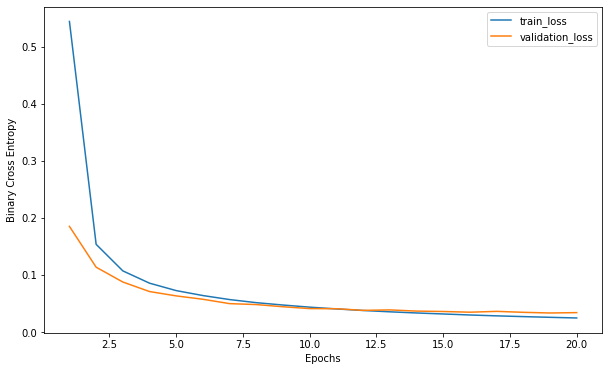

In [5]:
# Plot trainning and test error
plot_errors(history, epochs)

In [6]:
# Perform Prediction
y_pred = model.predict(X_test)

# Get list of prediction
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

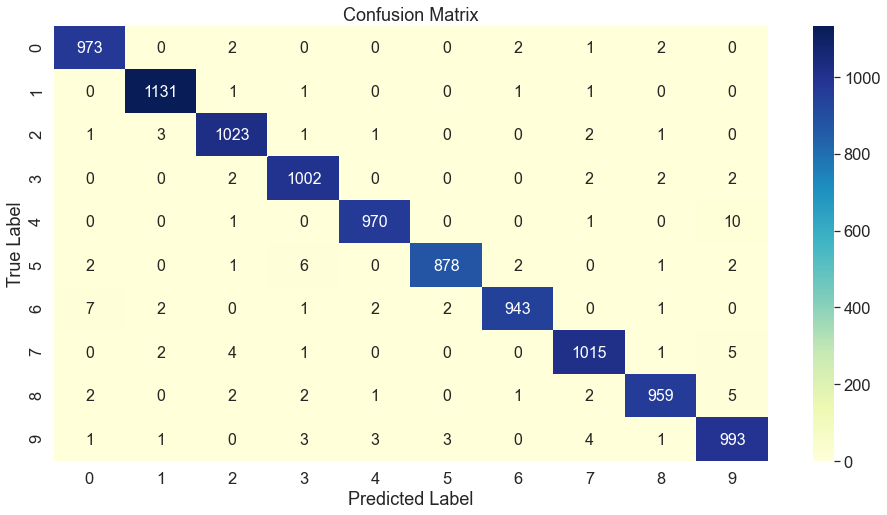

In [7]:
# Show Confusion Matrix
plot_confusion_matrix(y_test, y_pred, list(range(classes)))

In [11]:
# Loading the dataset and perform splitting
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Resize image to 32x 32
X_train = np.array([np.pad(X_train[i], pad_width=2) for i in range(X_train.shape[0]) ])
X_test = np.array([np.pad(X_test[i], pad_width=2) for i in range(X_test.shape[0]) ])

# Peforming reshaping operation
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

# Normalization
X_train = X_train / 255
X_test = X_test / 255

# # One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [12]:
image_size = X_train.shape[1:]
classes = y_train.shape[1]

lenet = Lenet5(image_size, classes)
model = lenet.model_init()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
__________

In [13]:
epochs = 20
batch_size = 32
loss = keras.metrics.categorical_crossentropy
optimizer = keras.optimizers.SGD()
metric = ['accuracy']
model, history = lenet.model_training(model, X_train, y_train, X_test, y_test, epochs, batch_size, 
                       loss, optimizer, metric)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.5950 - acc: 0.8506 - val_loss: 0.1973 - val_acc: 0.9447

Epoch 00001: val_acc improved from -inf to 0.94470, saving model to bestModel.h5
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1586 - acc: 0.9559 - val_loss: 0.1108 - val_acc: 0.9689

Epoch 00002: val_acc improved from 0.94470 to 0.96890, saving model to bestModel.h5
Epoch 3/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1076 - acc: 0.9691 - val_loss: 0.0821 - val_acc: 0.9762

Epoch 00003: val_acc improved from 0.96890 to 0.97620, saving model to bestModel.h5
Epoch 4/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0862 - acc: 0.9749 - val_loss: 0.0687 - val_acc: 0.9794

Epoch 00004: val_acc improved from 0.97620 to 0.97940, saving model to bestModel.h5
Epoch 5/20
60000/60000 [==============================] - 9s 

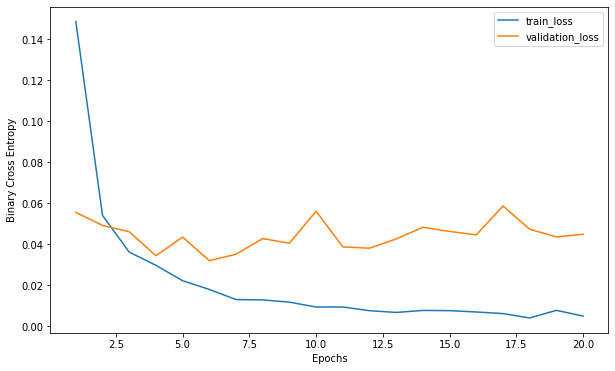

In [5]:
# Plot trainning and test error
lenet.plot_errors(history, epochs)

In [6]:
y_pred = model.predict(X_test)
y_pred

array([[2.28365615e-09, 7.33059480e-09, 2.82750765e-08, ...,
        9.99999642e-01, 1.74260328e-10, 2.04251762e-08],
       [1.29020236e-07, 1.55009715e-07, 9.99994278e-01, ...,
        2.33711791e-12, 3.44763258e-08, 9.90964987e-14],
       [1.40213133e-10, 9.99999166e-01, 2.57390165e-10, ...,
        1.01430224e-08, 2.21090531e-07, 2.16669217e-12],
       ...,
       [3.63560690e-13, 1.74681725e-09, 1.96109727e-14, ...,
        3.35687633e-09, 3.27610716e-09, 2.91500612e-07],
       [1.00395831e-10, 2.34454665e-12, 9.21587856e-15, ...,
        4.02944622e-11, 2.00010774e-07, 3.63092612e-11],
       [1.19815216e-08, 1.41540052e-11, 5.43430687e-08, ...,
        1.54245648e-12, 2.18031954e-10, 9.71816892e-14]], dtype=float32)

In [7]:
# Get list of prediction
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [8]:
# Get list of prediction
y_test = np.argmax(y_test, axis = 1)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

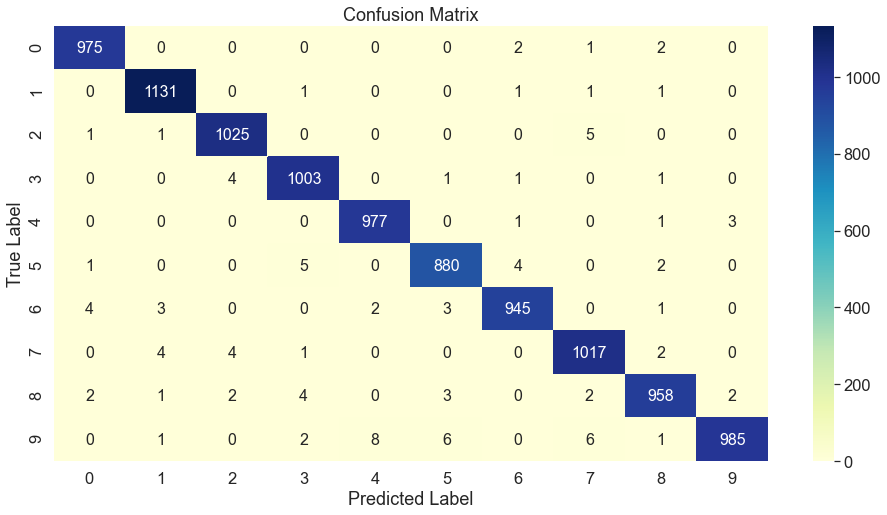

In [9]:
lenet.plot_confusion_matrix(y_test, y_pred,  list(range(10)))